In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("data/My Activity.xlsx")

## Features

In [3]:
# Create work function mapping for each activity
work_function = {
    "updating core modules": "data science",
    "adding features & contraints": "data science",
    "data manipulation": "data science",
    "product run & testing": "product management",
    "client interaction": "product management",
    "plant visit": "product management",
    "data analysis": "data science",
    "documentation": "product management",
    "miscellaneous": "data science",
    "testing & fixing bugs": "data science",
    "refactoring & improvements": "data science",
    "interface requests": "product management",
}

df["work_function"] = df["Activity"].map(work_function)

In [4]:
# Create time function mapping for each activity - average time
# Every task is more than an hour
time_for_activity = {
    "updating core modules": 4,
    "adding features & contraints": 2.5,
    "data manipulation": 2,
    "product run & testing": 1.5,
    "client interaction": 2.5,
    "plant visit": 7,
    "data analysis": 2,
    "documentation": 1.5,
    "miscellaneous": 2.5,
    "testing & fixing bugs": 2.5,
    "refactoring & improvements": 2,
    "interface requests": 2,
}

df["time_taken"] = df["Activity"].map(time_for_activity)

In [5]:
df["Week"] = df["Date"].dt.isocalendar().week

In [6]:
df["context_key"] = df["Activity"] + "-" + df["Project"] + "-" + df["Date"].astype(str)

## Analysis

### Work hours and efficiency

I used to plan my daily tasks usually a day before in the evening or in the morning. A task is an activity which will take atleast an hour.

In [7]:
print(f"Tasks per day: {df.groupby('Date')['Activity'].count().mean():.2f}")
print(f"Tasks per week: {df.groupby('Week')['Activity'].count().mean():.2f}")

Tasks per day: 2.97
Tasks per week: 15.45


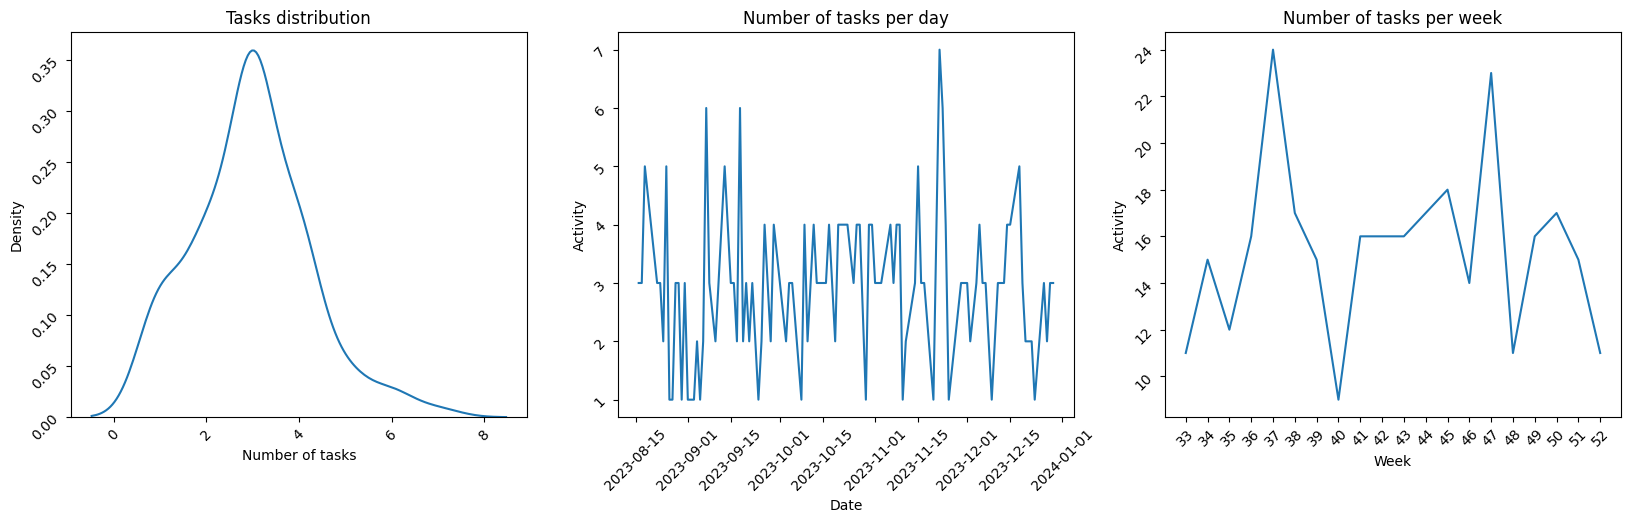

In [8]:
fig, axes = plt.subplots(figsize=(20,5), nrows=1, ncols=3)
for ax in axes:
    ax.tick_params(rotation=45)

# Distribution of tasks per day
sns.kdeplot(df.groupby("Date")["Activity"].count(), ax=axes[0])
axes[0].set_xlabel("Number of tasks")
axes[0].set_title("Tasks distribution")

# Tasks trend per day
currdf = df.groupby("Date")["Activity"].count()
sns.lineplot(currdf, ax=axes[1])
axes[1].set_title("Number of tasks per day")

# Tasks trend per week
currdf = df.groupby("Week")["Activity"].count()
sns.lineplot(currdf, ax=axes[2])
axes[2].set_xticks(ticks=list(currdf.index.unique()))
axes[2].set_title("Number of tasks per week")

plt.show()

In [9]:
print("Pure work time:")
print(f"Work hours per day: {df.groupby('Date')['time_taken'].sum().mean():.2f}")
print(f"Work hours per week: {df.groupby('Week')['time_taken'].sum().mean():.2f}")

# Research shows that on average people takes 23 min to regain focus especai
# Assuming it twice going in-and-out of context + random calls, meetings, updates, emails and talks that happen during office hours
print("\nAfter adding context switch:")
df_context_day = df.groupby(["Date"]).agg(activity_time=("time_taken","sum"), num_contexts=("context_key","nunique"))
df_context_day["total_time"] = df_context_day["activity_time"] + (23 * 2 / 60) * df_context_day["num_contexts"]
df_context_week = df.groupby(["Week"]).agg(activity_time=("time_taken","sum"), num_contexts=("context_key","nunique"))
df_context_week["total_time"] = df_context_week["activity_time"] + (23 * 2 / 60) * df_context_week["num_contexts"]

print(f"Work hours per day: {df_context_day['total_time'].mean():.2f} hrs")
print(f"Work hours per week: {df_context_week['total_time'].mean():.2f} hrs")

# I go office 2 days/week, 3 weeks/month and 1 week plant visit on average
# Going to office takes me 4 hours and one-way visit takes me 6.5 hrs on average
print("\nAfter adding official travel time:")
travel_time_per_week = (4 * 2 * 3 + 6.5 * 2) / 4
print(f"Work hours per week: {df_context_week['total_time'].mean() + travel_time_per_week:.2f} hrs")

Pure work time:
Work hours per day: 7.98
Work hours per week: 41.48

After adding context switch:
Work hours per day: 9.99 hrs
Work hours per week: 51.94 hrs

After adding official travel time:
Work hours per week: 61.19 hrs


I cannot count every small call, KT, brunch, discussion, mail, etc. Practically, it feels more than 65 hours. Just like supply is always less than scheduled production.

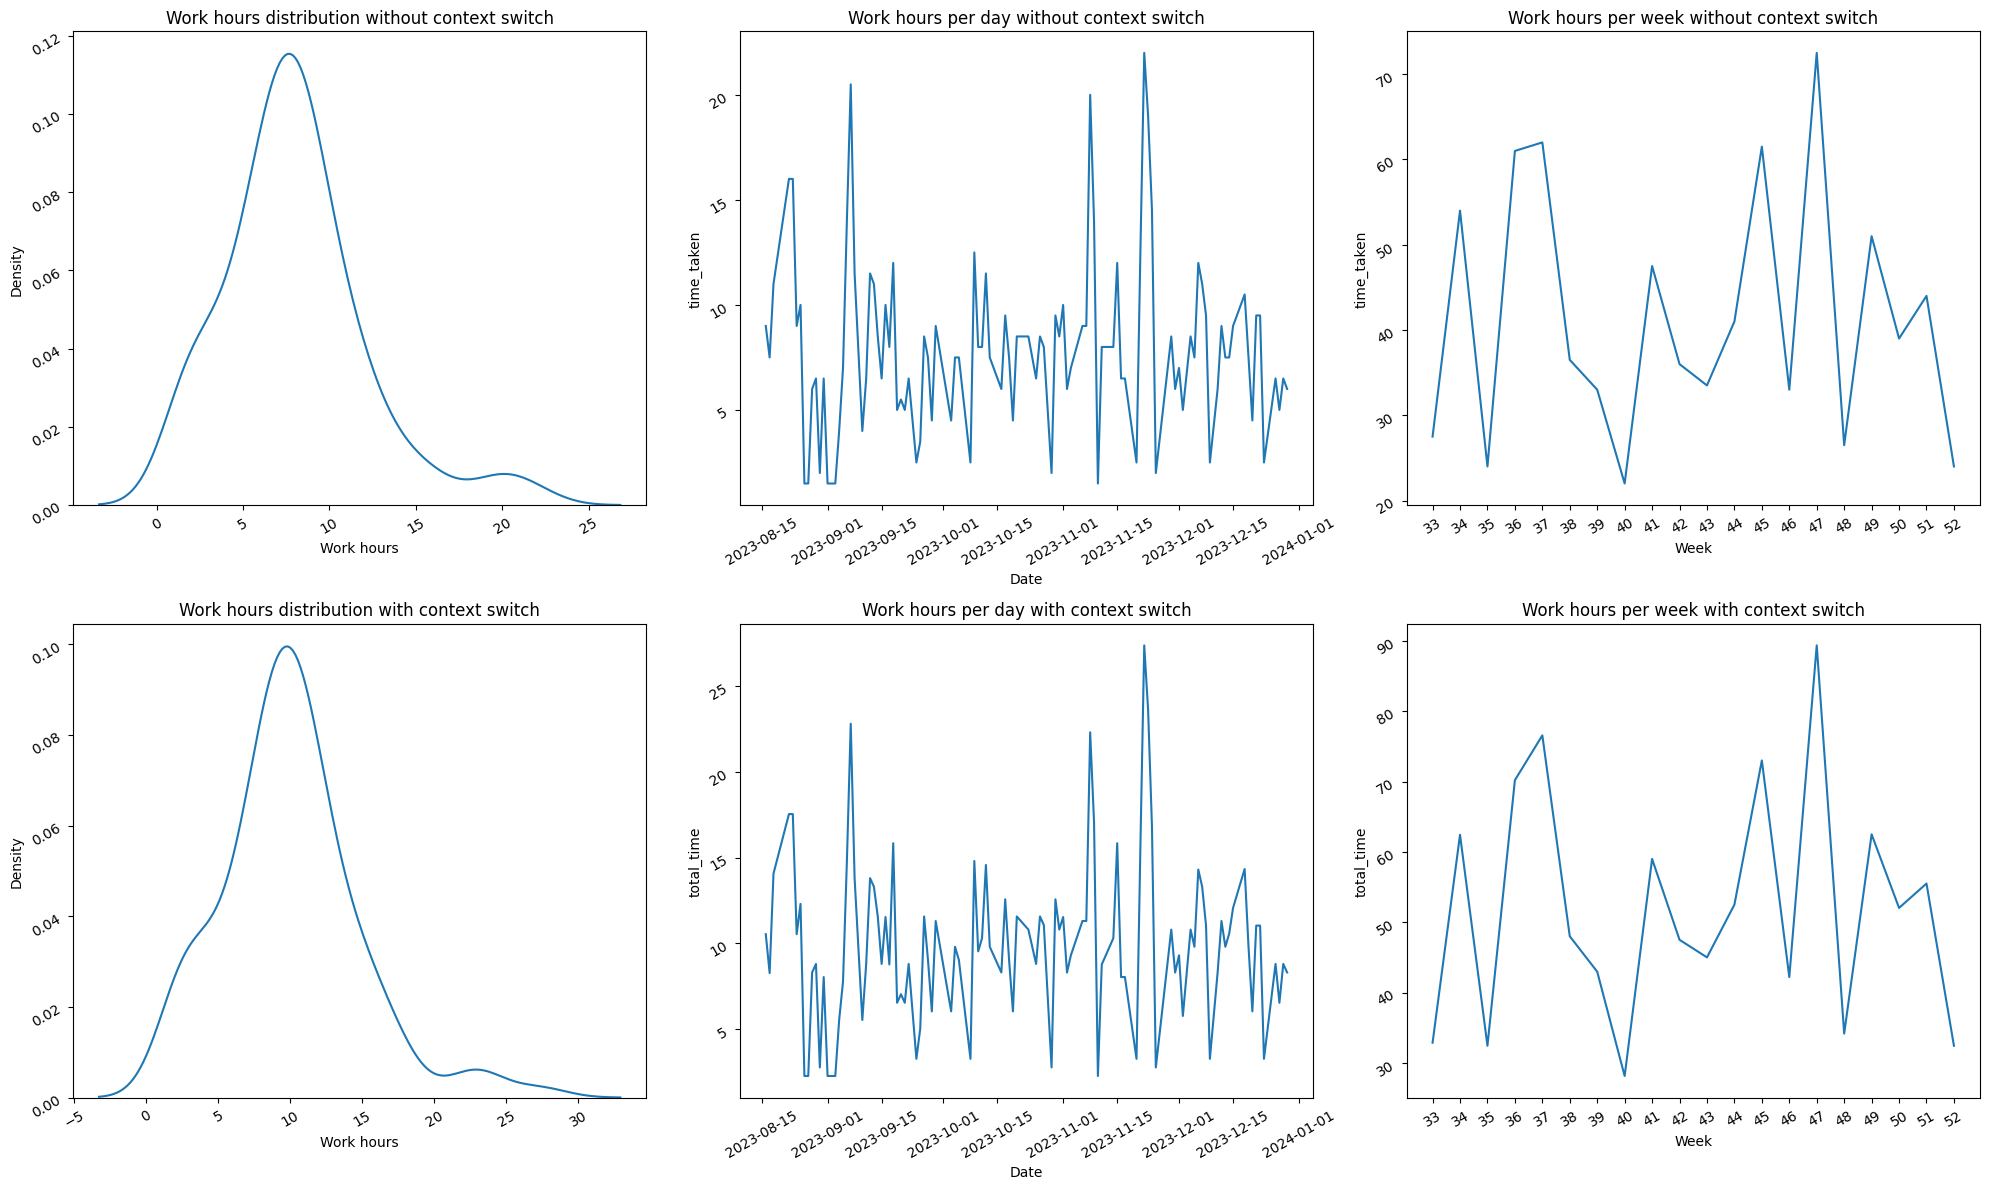

In [10]:
fig, axes = plt.subplots(figsize=(20,12), nrows=2, ncols=3)
for ax in axes.ravel():
    ax.tick_params(rotation=30)

# Distribution of work hours per day
sns.kdeplot(df.groupby("Date")["time_taken"].sum(), ax=axes[0, 0])
axes[0, 0].set_xlabel("Work hours")
axes[0, 0].set_title("Work hours distribution without context switch")

# Work hours trend per day
currdf = df.groupby("Date")["time_taken"].sum()
sns.lineplot(currdf, ax=axes[0, 1])
axes[0, 1].set_title("Work hours per day without context switch")

# Work hours trend per week
currdf = df.groupby("Week")["time_taken"].sum()
sns.lineplot(currdf, ax=axes[0, 2])
axes[0, 2].set_xticks(ticks=list(currdf.index.unique()))
axes[0, 2].set_title("Work hours per week without context switch")

# Distribution of work hours per day after context switch
sns.kdeplot(df_context_day["total_time"], ax=axes[1, 0])
axes[1, 0].set_xlabel("Work hours")
axes[1, 0].set_title("Work hours distribution with context switch")

# Work hours trend per day after context switch
currdf = df.groupby("Date")["time_taken"].sum()
sns.lineplot(df_context_day["total_time"], ax=axes[1, 1])
axes[1, 1].set_title("Work hours per day with context switch")

# Work hours trend per week after context switch
currdf = df.groupby("Week")["time_taken"].sum()
sns.lineplot(df_context_week["total_time"], ax=axes[1, 2])
axes[1, 2].set_xticks(ticks=list(currdf.index.unique()))
axes[1, 2].set_title("Work hours per week with context switch")

fig.tight_layout()
plt.show()

### Work division

In [11]:
print(f"Average number of projects running simultaneously per week: {df.groupby('Week')['Project'].nunique().mean():.2f}")

Average number of projects running simultaneously per week: 2.45


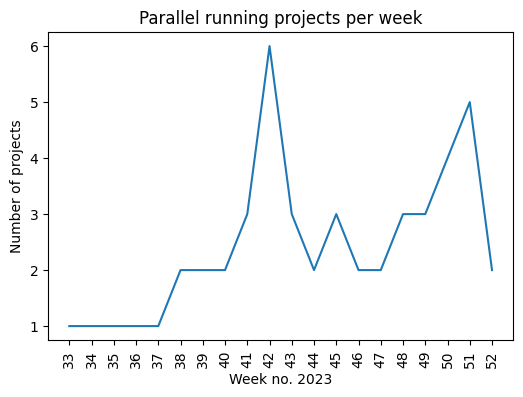

In [12]:
plt.figure(figsize=(6,4))
currdf = df.groupby("Week")["Project"].nunique()
sns.lineplot(x=currdf.index, y=currdf.values)
plt.xticks(ticks=list(currdf.index.unique()), rotation=90)
plt.title("Parallel running projects per week")
plt.ylabel("Number of projects")
plt.xlabel("Week no. 2023")
plt.show()

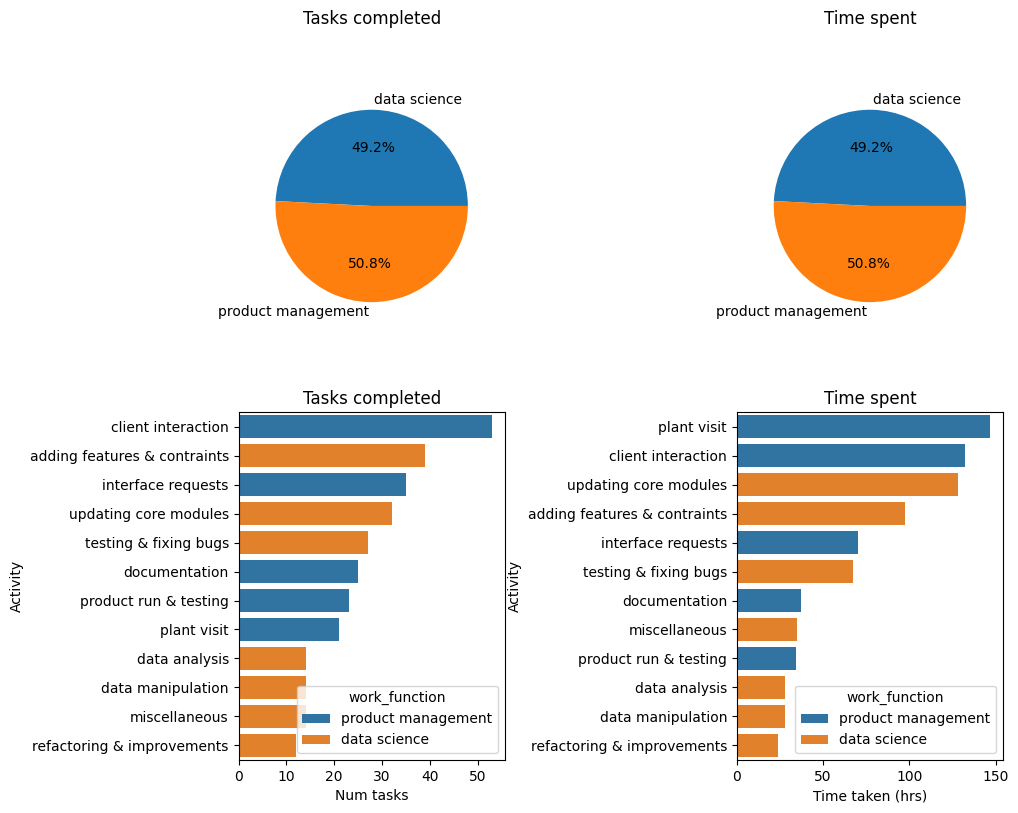

In [14]:
# Pie charts for work function as number of tasks
fig, axes = plt.subplots(figsize=(10,8), nrows=2, ncols=2)

currdf = df.groupby("work_function")["Activity"].count()
axes[0, 0].pie(currdf.values, labels=currdf.index, autopct='%1.1f%%')
axes[0, 0].set_title("Tasks completed")
axes[0, 0].axis("equal")

currdf = df.groupby("work_function")["time_taken"].sum()
axes[0, 1].pie(currdf.values, labels=currdf.index, autopct='%1.1f%%')
axes[0, 1].set_title("Time spent")
axes[0, 1].axis("equal")

# Work function breakdown
currdf = df.groupby("Activity").agg({"Description": "count", "work_function": "first"}).reset_index().sort_values("Description", ascending=False)
sns.barplot(data=currdf, y="Activity", x="Description", hue="work_function", ax=axes[1, 0])
axes[1, 0].set_xlabel("Num tasks")
axes[1, 0].set_title("Tasks completed")

currdf = df.groupby("Activity").agg({"time_taken": "sum", "work_function": "first"}).reset_index().sort_values("time_taken", ascending=False)
sns.barplot(data=currdf, y="Activity", x="time_taken", hue="work_function", ax=axes[1, 1])
axes[1, 1].set_xlabel("Time taken (hrs)")
axes[1, 1].set_title("Time spent")

fig.tight_layout(pad=0.25)
plt.show()